In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%run 01_LLMs_konfigurieren.ipynb

In [3]:
%run 02_Daten_laden.ipynb

In [4]:
irony_subset = irony_final[:1001]
irony_subset

,index,Label,text
0,0,1,Sweet United Nations video. Just in time for C...
1,1,1,@mrdahl87 We are rumored to have talked to Erv...
2,2,1,Hey there! Nice to see you Minnesota/ND Winter...
3,3,0,3 episodes left I'm dying over here
4,4,1,I can't breathe! was chosen as the most notabl...
...,...,...,...
996,996,0,It was a greaaaat night! :white_smiling_face:️...
997,997,0,@StephHammy I wonder if they have that in an a...
998,998,0,Queens Of The Stone Age no Rock In Rio http://...
999,999,1,@jordyn_eaton wants me to get hit by a bus so ...


In [5]:
# irony_subset.to_csv('/Users/marvinschmitt/Library/CloudStorage/OneDrive-Persönlich/M.Sc. Data Science/17 Masterarbeit/Repo/Prod/CSVs/MAST_SemEval2018_SUBSET_1000.csv')



# OneShot 

## OpenAI / GPT

In [5]:
openai_client

In [6]:
irony_subset

,index,Label,text
0,0,1,Sweet United Nations video. Just in time for C...
1,1,1,@mrdahl87 We are rumored to have talked to Erv...
2,2,1,Hey there! Nice to see you Minnesota/ND Winter...
3,3,0,3 episodes left I'm dying over here
4,4,1,I can't breathe! was chosen as the most notabl...
...,...,...,...
996,996,0,It was a greaaaat night! :white_smiling_face:️...
997,997,0,@StephHammy I wonder if they have that in an a...
998,998,0,Queens Of The Stone Age no Rock In Rio http://...
999,999,1,@jordyn_eaton wants me to get hit by a bus so ...


### ABSA

### 4o

In [7]:
# Leeres DataFrame erstellen, um die Ergebnisse zu speichern
results_gpt_df = pd.DataFrame(columns=['index', 'sentence', 'generated_label'])

# Zähler für das Einfügen in das DataFrame
row_counter = 0

# Schleife mit API-Call
for index, row in irony_subset.iterrows():
    text = row['text']
    #print(text)

    try:
        # GenAI Model-Aufruf für die Sentiment-Klassifikation
        response = openai_client.chat.completions.create(
            model="gpt-4o", # gpt-3.5-turbo # gpt-4o-mini
            messages=[

                {
                "role":"system",
                "content":"""
                    You determine whether a text contains ironic or sarcastic elements.
                    Return 0 for No and 1 for Yes. Only return 0 or 1 without additional text.
                    
                    Here is an example:
                    Input: "Does the following text contain ironic or sarcastic elements? 
                            Text: '@BaniHillal "i feel bad for the American people, now we should invade their country in kill their children so we can save them"'  
                    Output: 1
                    """,
                },
                {
                "role": "user",
                 "content": (f"""Does the following text contain ironic or sarcastic elements? 
                                 Text: {text} 
                             """)
                }
            ],
            temperature = 0.2
        )
        response_content = response.choices[0].message.content
        print(index, " ", response_content)        
        

        # Ergebnis in das DataFrame effizient speichern
        results_gpt_df.loc[row_counter] = [index, text, response_content]
        row_counter += 1

    except Exception as e:
        # Fehlerbehandlung, wenn etwas beim API-Aufruf oder Speichern schiefgeht
        print(f"Fehler bei der Verarbeitung der Zeile {index}: {str(e)}")

# Entferne Zeilenumbrüche und Leerzeichen aus der Spalte 'generated_label'
results_gpt_df['generated_label'] = results_gpt_df['generated_label'].str.strip()

# Behalte nur die Zeilen mit generierten Labels, die entweder 0 oder 1 sind
results_gpt_df_final = results_gpt_df[results_gpt_df['generated_label'].isin(['0', '1','2',0,1,2])]

# als int formatieren
results_gpt_df_final['generated_label'] = results_gpt_df_final['generated_label'].astype(int)




0   1
1   1
2   1
3   0
4   0
5   0
6   1
7   1
8   0
9   0
10   1
11   1
12   1
13   0
14   1
15   1
16   1
17   1
18   1
19   1
20   1
21   1
22   0
23   0
24   1
25   0
26   0
27   0
28   0
29   1
30   1
31   1
32   0
33   1
34   1
35   0
36   0
37   1
38   1
39   1
40   1
41   1
42   1
43   1
44   0
45   1
46   1
47   0
48   1
49   1
50   1
51   1
52   1
53   0
54   0
55   1
56   0
57   0
58   1
59   1
60   1
61   1
62   1
63   1
64   1
65   1
66   1
67   1
68   1
69   0
70   1
71   0
72   1
73   0
74   1
75   1
76   1
77   1
78   0
79   1
80   0
81   0
82   1
83   0
84   0
85   0
86   1
87   0
88   0
89   1
90   1
91   1
92   1
93   1
94   1
95   0
96   1
97   0
98   1
99   1
100   1
101   1
102   0
103   0
104   1
105   1
106   0
107   0
108   1
109   1
110   1
111   0
112   1
113   0
114   1
115   0
116   0
117   0
118   1
119   0
120   0
121   0
122   1
123   0
124   0
125   0
126   0
127   1
128   1
129   1
130   0
131   1
132   0
133   0
134   1
135   0
136   1
137   1
138   

In [ ]:

# CSV abspeichern 
results_gpt_df_final.to_csv('/Users/marvinschmitt/Library/CloudStorage/OneDrive-Persönlich/M.Sc. Data Science/17 Masterarbeit/Repo/Prod/CSVs/MAST_SemEval2018_OneShot_GPT4o.csv')


### Evaluation

In [9]:

# Beide DataFrames anhand der 'index'-Spalte mergen
df_combined = pd.merge(irony_subset, results_gpt_df_final, on='index')

# Die Spalten 'label' und 'generated_label' sollten die tatsächlichen und vorhergesagten Labels enthalten
true_labels = df_combined['Label']  # Tatsächliche Labels (z.B. aus SST2)
predicted_labels = df_combined['generated_label']  # Vorhergesagte Labels (z.B. aus GPT)

# 1. Accuracy (Genauigkeit)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# 2. Precision (Genauigkeit der Klassifikation für alle Klassen)
precision = precision_score(true_labels, predicted_labels)
print(f'Precision (macro): {precision:.2f}')

# 3. Recall (Empfindlichkeit für alle Klassen)
recall = recall_score(true_labels, predicted_labels)
print(f'Recall (macro): {recall:.2f}')

# 4. F1-Score (harmonisches Mittel von Precision und Recall für alle Klassen)
f1 = f1_score(true_labels, predicted_labels)
print(f'F1-Score (macro): {f1:.2f}')

# 5. Confusion Matrix (Verwirrungsmatrix)
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=[0, 1])
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.73
Precision (macro): 0.70
Recall (macro): 0.83
F1-Score (macro): 0.76
Confusion Matrix:
[[304 186]
 [ 86 425]]


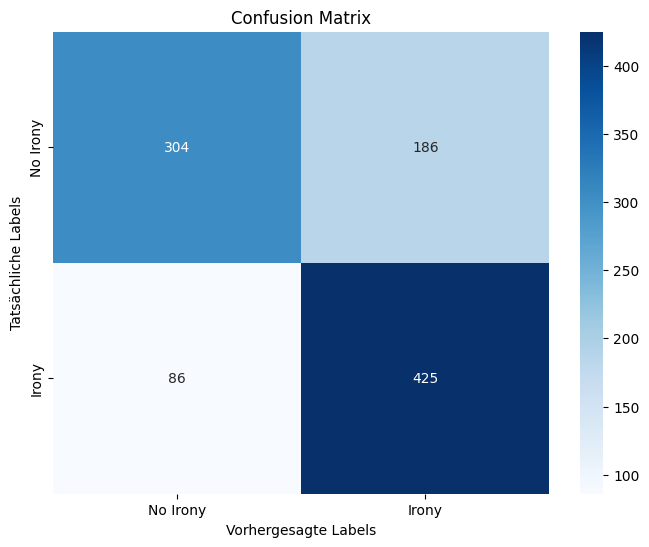

In [11]:
# Confusion Matrix berechnen (true_labels und predicted_labels sind die tatsächlichen und vorhergesagten Labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Klassenlabels definieren
class_names = ['No Irony', 'Irony']

# Confusion Matrix als Heatmap darstellen
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Achsen beschriften
plt.xlabel('Vorhergesagte Labels')
plt.ylabel('Tatsächliche Labels')
plt.title('Confusion Matrix')

# Plot anzeigen
plt.show()

## Gemini

In [5]:
genai_model

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash',
    generation_config={'temperature': 0.2},
    safety_settings={<HarmCategory.HARM_CATEGORY_HARASSMENT: 7>: <HarmBlockThreshold.BLOCK_NONE: 4>, <HarmCategory.HARM_CATEGORY_HATE_SPEECH: 8>: <HarmBlockThreshold.BLOCK_NONE: 4>, <HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: 9>: <HarmBlockThreshold.BLOCK_NONE: 4>, <HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: 10>: <HarmBlockThreshold.BLOCK_NONE: 4>},
    tools=None,
    system_instruction=None,
    cached_content=None
)

### SemEval-2014

In [6]:
# System-Prompts

genai_model=genai.GenerativeModel(
  model_name="gemini-1.5-flash",
    safety_settings='BLOCK_NONE',
    generation_config={'temperature': 0.2},
    system_instruction="""
                    You determine whether a text contains ironic or sarcastic elements.
                    Return 0 for No and 1 for Yes. Only return 0 or 1 without additional text.
                    
                    Here is an example:
                    Input: "Does the following text contain ironic or sarcastic elements? 
                            Text: '@BaniHillal "i feel bad for the American people, now we should invade their country in kill their children so we can save them"'  
                    Output: 1
                    """)

# Leeres DataFrame erstellen, um die Ergebnisse zu speichern
results_gemini_df = pd.DataFrame(columns=['index', 'sentence', 'generated_label'])

# Zähler für das Einfügen in das DataFrame
row_counter = 0

# Schleife mit API-Call
for index, row in irony_subset.iterrows():
    text = row['text']


    try:
        # GenAI Model-Aufruf für die Sentiment-Klassifikation
        response = genai_model.generate_content(f"""Does the following text contain ironic or sarcastic elements? 
                                                 Text: {text}""")
        print(index, " ", response.text)

        # Ergebnis in das DataFrame effizient speichern
        results_gemini_df.loc[row_counter] = [index, text, response.text]
        row_counter += 1

    except Exception as e:
        # Fehlerbehandlung, wenn etwas beim API-Aufruf oder Speichern schiefgeht
        print(f"Fehler bei der Verarbeitung der Zeile {index}: {str(e)}")

# Entferne Zeilenumbrüche und Leerzeichen aus der Spalte 'generated_label'
results_gemini_df['generated_label'] = results_gemini_df['generated_label'].str.strip()

# Behalte nur die Zeilen mit generierten Labels, die entweder 0 oder 1 sind
results_gemini_df_final = results_gemini_df[results_gemini_df['generated_label'].isin(['0', '1','2',0,1,2])]

# als int formatieren
results_gemini_df_final['generated_label'] = results_gemini_df_final['generated_label'].astype(int)



0   1

1   1

2   1 

3   1 

4   1 

5   1

6   1 

7   1 

8   1 

9   1 

10   1

11   1

12   1

13   0 

14   1 

15   1

16   1 

17   1

18   1

19   1

20   1

21   1

22   0 

23   0 

24   1 

25   1

26   0 

27   1

28   1

29   1

30   1

31   1 

32   1 

33   1

34   1 

35   1 

36   0 

37   1

38   1 

39   1 

40   1

41   1

42   1 

43   1 

44   1

45   0 

46   1

47   0

48   0

49   1 

50   1 

51   1 

52   1

53   0 

54   1 

55   1 

56   0

57   1 

58   1

59   1 

60   1 

61   1

62   1

63   1

64   1 

65   1

66   1 

67   1

68   1

69   1 

70   1 

71   1

72   1 

73   1

74   1 

75   1 

76   1

77   1

78   1

79   1 

80   1 

81   0 

82   1 

83   0 

84   0 

85   0 

86   1 

87   1

88   1

89   1

90   1 

91   1 

92   1 

93   1

94   1 

95   1 

96   1 

97   0 

98   1 

99   1 

100   1 

101   1

102   1

103   1

104   1

105   1

106   0 

107   0 

108   1

109   1 

110   1

111   1 

112   1

113   1

114   1 

115   1 

11

In [7]:

# CSV abspeichern 
results_gemini_df_final.to_csv("""/Users/marvinschmitt/Library/CloudStorage/OneDrive-Persönlich/M.Sc. Data Science/17 Masterarbeit/Repo/Prod/CSVs/MAST_OneShot_GEMINI.csv""")


#### Evaluation

In [9]:

# Beide DataFrames anhand der 'index'-Spalte mergen
df_combined = pd.merge(irony_subset, results_gemini_df_final, on='index')

# Die Spalten 'label' und 'generated_label' sollten die tatsächlichen und vorhergesagten Labels enthalten
true_labels = df_combined['Label']  # Tatsächliche Labels (z.B. aus SST2)
predicted_labels = df_combined['generated_label']  # Vorhergesagte Labels (z.B. aus GPT)

# 1. Accuracy (Genauigkeit)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# 2. Precision (Genauigkeit der Klassifikation für alle Klassen)
precision = precision_score(true_labels, predicted_labels)
print(f'Precision (macro): {precision:.2f}')

# 3. Recall (Empfindlichkeit für alle Klassen)
recall = recall_score(true_labels, predicted_labels)
print(f'Recall (macro): {recall:.2f}')

# 4. F1-Score (harmonisches Mittel von Precision und Recall für alle Klassen)
f1 = f1_score(true_labels, predicted_labels)
print(f'F1-Score (macro): {f1:.2f}')

# 5. Confusion Matrix (Verwirrungsmatrix)
conf_matrix_gemini = confusion_matrix(true_labels, predicted_labels, labels=[0, 1])
print('Confusion Matrix:')
print(conf_matrix_gemini)

Accuracy: 0.62
Precision (macro): 0.58
Recall (macro): 0.94
F1-Score (macro): 0.71
Confusion Matrix:
[[139 351]
 [ 33 478]]


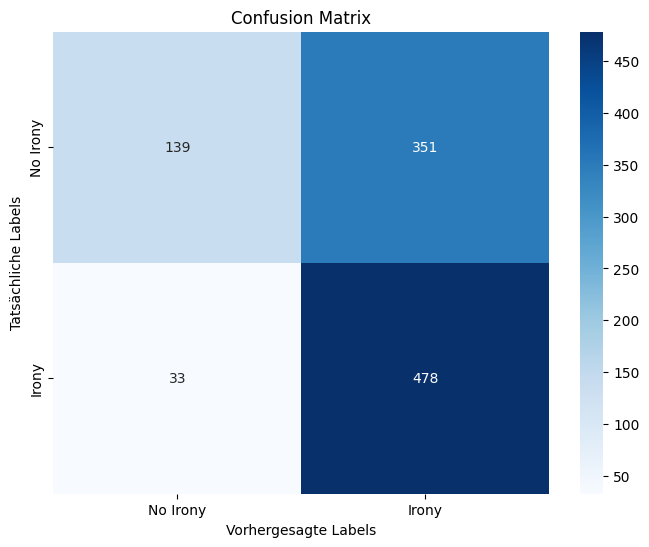

In [11]:
# Confusion Matrix berechnen (true_labels und predicted_labels sind die tatsächlichen und vorhergesagten Labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Klassenlabels definieren
class_names = ['No Irony', 'Irony']

# Confusion Matrix als Heatmap darstellen
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gemini, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Achsen beschriften
plt.xlabel('Vorhergesagte Labels')
plt.ylabel('Tatsächliche Labels')
plt.title('Confusion Matrix')

# Plot anzeigen
plt.show()